In [22]:
from src.AnalysisHelper import plot_results
import clustbench
import genieclust
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import os

In [23]:
results_path = "data/ref-precomputed-results"
data_path = "data"
data_url = "https://github.com/gagolews/clustering-data-v1/raw/v1.1.0"
battery = "wut"
dataset = "mk1"
reference_methods_group = "*"

## Loading benchmark dataset

In [24]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([2, 3, 1])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [25]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['GIc', 'Genie_G0.1', 'Genie_G0.3', 'Genie_G0.5', 'Genie_G0.7', 'Genie_G1.0', 'ITM', 'IcA', 'fastcluster_average', 'fastcluster_centroid', 'fastcluster_complete', 'fastcluster_median', 'fastcluster_ward', 'fastcluster_weighted', 'FCPS_AdaptiveDensityPeak', 'FCPS_Minimax', 'FCPS_MinEnergy', 'FCPS_HDBSCAN_4', 'FCPS_HDBSCAN_2', 'FCPS_HDBSCAN_8', 'FCPS_Diana', 'FCPS_Fanny', 'FCPS_Hardcl', 'FCPS_Softcl', 'FCPS_Clara', 'FCPS_PAM', 'HEMST', 'CTCEHC', 'BallHall', 'CalinskiHarabasz', 'DaviesBouldin', 'DuNN_5_Max_Const', 'DuNN_5_Max_Max', 'DuNN_5_Max_Mean', 'DuNN_5_Max_Min', 'DuNN_5_Mean_Const', 'DuNN_5_Mean_Max', 'DuNN_5_Mean_Mean', 'DuNN_5_Mean_Min', 'DuNN_5_Min_Const', 'DuNN_5_Min_Max', 'DuNN_5_Min_Mean', 'DuNN_5_Min_Min', 'DuNN_25_Max_Const', 'DuNN_25_Max_Max', 'DuNN_25_Max_Mean', 'DuNN_25_Max_Min', 'DuNN_25_Mean_Const', 'DuNN_25_Mean_Max', 'DuNN_25_Mean_Mean', 'DuNN_25_Mean_Min', 'DuNN_25_Min_Const', 'DuNN_25_Min_Max', 'DuNN_25_Min_Mean', 'DuNN_25_Min_Min', 'DuNN_25_SMax:5_Const',

## NBC clusterization

In [26]:
%%time
m = cluster.KMeans()
results["KMeans"] = clustbench.fit_predict_many(m, benchmark.data, benchmark.n_clusters)
results.keys()

CPU times: total: 15.6 ms
Wall time: 22 ms


c:\Users\mmakaranka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


dict_keys(['GIc', 'Genie_G0.1', 'Genie_G0.3', 'Genie_G0.5', 'Genie_G0.7', 'Genie_G1.0', 'ITM', 'IcA', 'fastcluster_average', 'fastcluster_centroid', 'fastcluster_complete', 'fastcluster_median', 'fastcluster_ward', 'fastcluster_weighted', 'FCPS_AdaptiveDensityPeak', 'FCPS_Minimax', 'FCPS_MinEnergy', 'FCPS_HDBSCAN_4', 'FCPS_HDBSCAN_2', 'FCPS_HDBSCAN_8', 'FCPS_Diana', 'FCPS_Fanny', 'FCPS_Hardcl', 'FCPS_Softcl', 'FCPS_Clara', 'FCPS_PAM', 'HEMST', 'CTCEHC', 'BallHall', 'CalinskiHarabasz', 'DaviesBouldin', 'DuNN_5_Max_Const', 'DuNN_5_Max_Max', 'DuNN_5_Max_Mean', 'DuNN_5_Max_Min', 'DuNN_5_Mean_Const', 'DuNN_5_Mean_Max', 'DuNN_5_Mean_Mean', 'DuNN_5_Mean_Min', 'DuNN_5_Min_Const', 'DuNN_5_Min_Max', 'DuNN_5_Min_Mean', 'DuNN_5_Min_Min', 'DuNN_25_Max_Const', 'DuNN_25_Max_Max', 'DuNN_25_Max_Mean', 'DuNN_25_Max_Min', 'DuNN_25_Mean_Const', 'DuNN_25_Mean_Max', 'DuNN_25_Mean_Mean', 'DuNN_25_Mean_Min', 'DuNN_25_Min_Const', 'DuNN_25_Min_Max', 'DuNN_25_Min_Mean', 'DuNN_25_Min_Min', 'DuNN_25_SMax:5_Const',

## NBC-TI clusterization

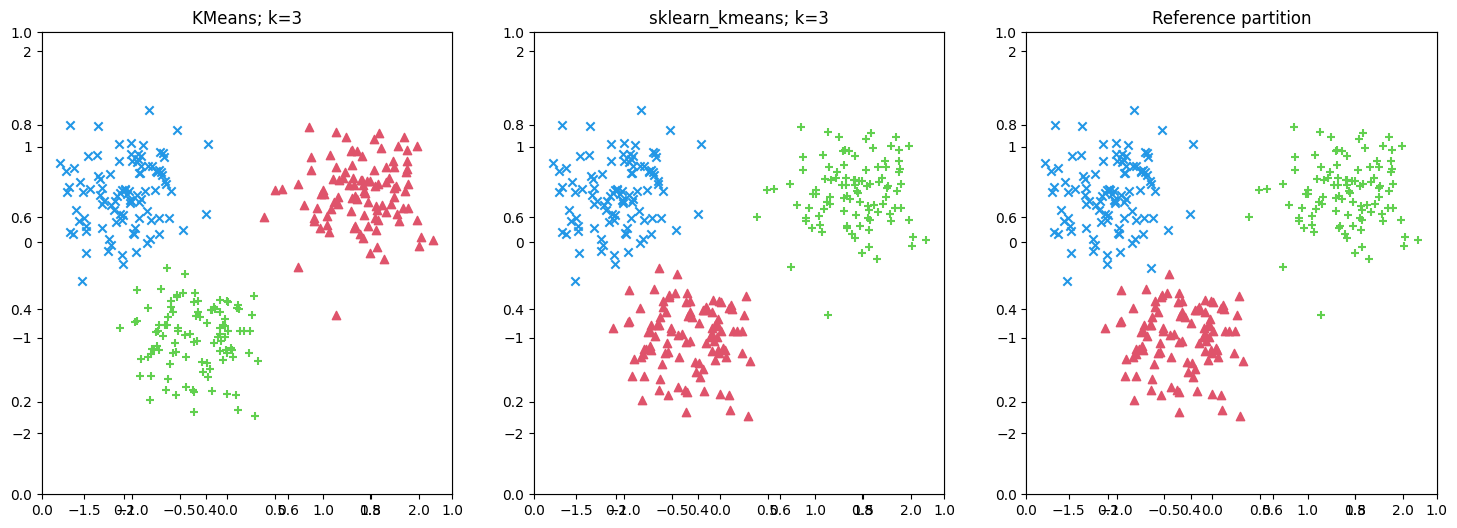

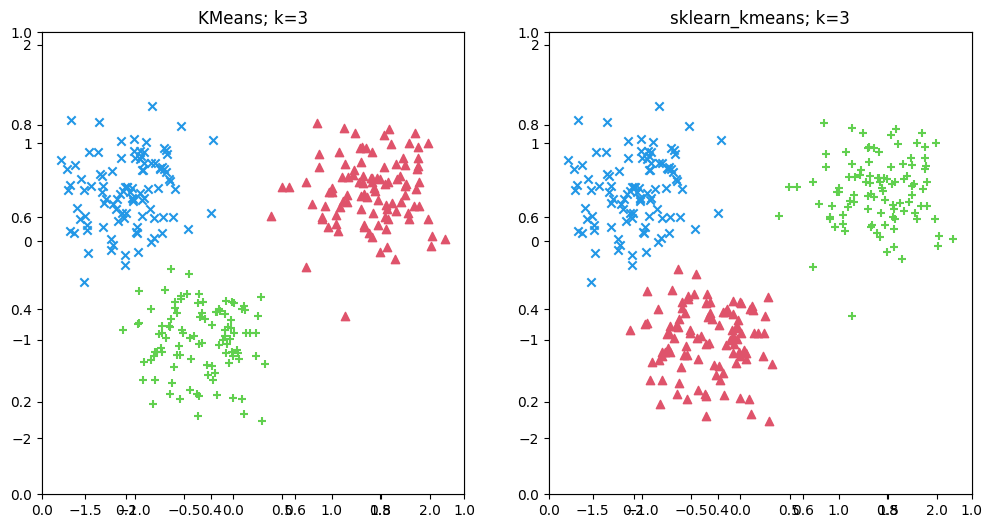

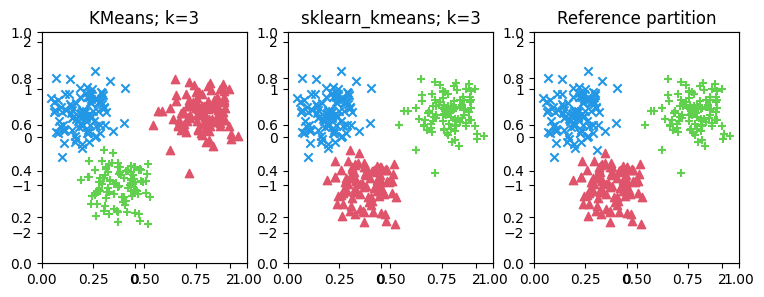

In [27]:
plot_results(["KMeans", "sklearn_kmeans"], benchmark.data, results, reference)
plot_results(["KMeans", "sklearn_kmeans"], benchmark.data, results)
plot_results(["KMeans", "sklearn_kmeans"], benchmark.data, results, reference, fig_size=3)

In [28]:
for i, k in enumerate(results["KMeans"].keys()):
    print('{}\n{}'.format(genieclust.compare_partitions.confusion_matrix(reference, results["KMeans"][k]), genieclust.compare_partitions.confusion_matrix(reference, results["sklearn_kmeans"][k])))


[[  0 100   0]
 [100   0   0]
 [  0   1  99]]
[[100   0   0]
 [  0 100   0]
 [  1   0  99]]
